In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking for null values

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Dropping the ID column

In [11]:
df.drop('customerID', axis=1, inplace=True)

In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Label the churn feature

In [13]:
df['target']=np.where(df['Churn']=="Yes",1,0)

### Dropping the churn column

In [14]:
df.drop('Churn', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Defining Target and Independent Features

In [15]:
x = df.drop('target', axis=1)
y = df.target

### Getting the churn rate

In [16]:
y.mean()

0.2653698707936959

### this means 26% of the given data are churning

## Split features into Numerical and Categorical

In [18]:
num=x.select_dtypes(include="number")
char=x.select_dtypes(include="object")

In [19]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [20]:
#Check whether SeniorCitizon feaure is an indicator
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [21]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


#### Dropping the indicator features from num to build a separate DF

In [22]:
ind=num[['SeniorCitizen']]
num=num.drop(['SeniorCitizen'],axis=1)

## Outlier Analysis of Numerical Features

In [23]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


## Capping and Flooring of outliers

In [24]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

num=num.apply(lambda x : outlier_cap(x))

In [25]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


## Feature Selection - Numerical Features 

### Part 1 : Remove Features with 0 Variance

In [26]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [27]:
cols

array([0, 1, 2], dtype=int64)

In [28]:
num_1

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [29]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

### Part 2 - Bi Variate Analysis (Feature Discretization)

In [30]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1), columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


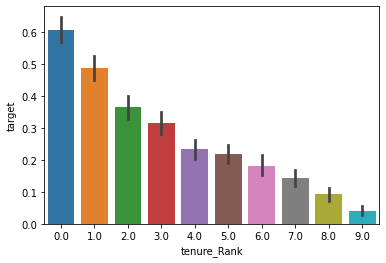

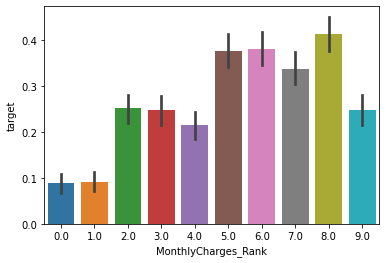

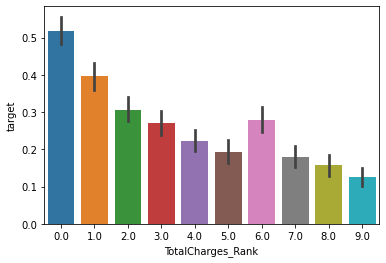

In [32]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

#### From the above figures, there is some kind of relationship between the the numerical and the target feature, i.e, with increase in tenure, the churn rate is decreasing. With increase in monthly charges, churn rate is increasing, with increase in Total charges, churn rate decreasing.

In [33]:
# All features from num_2 will get selected due to good discrimination
select_features_df_num=num_1

### Feature Selection - Categorical Features 

In [34]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

### Part 1 - Bi Variate Analysis

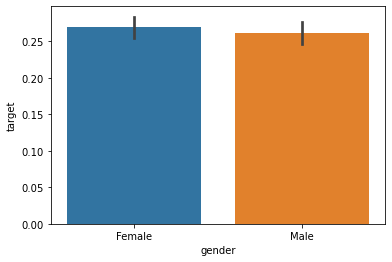

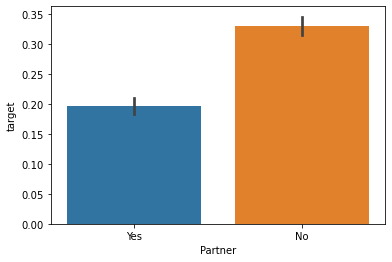

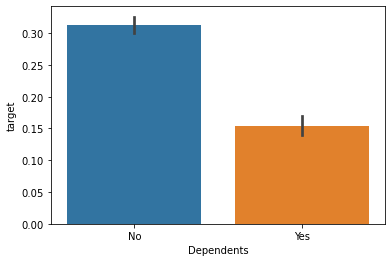

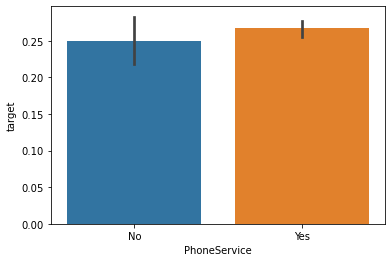

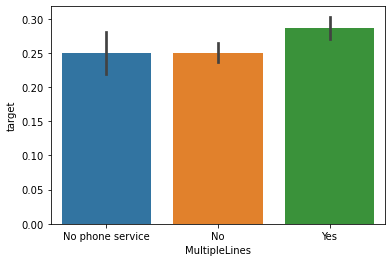

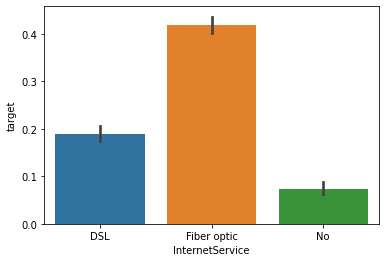

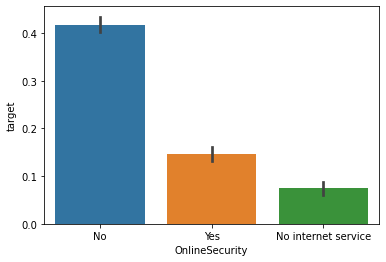

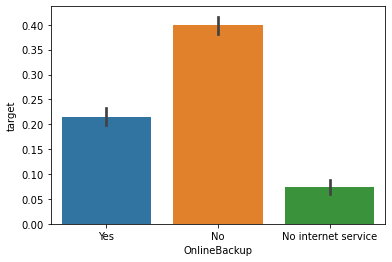

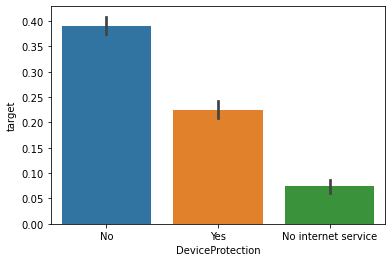

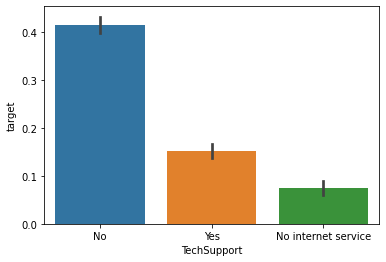

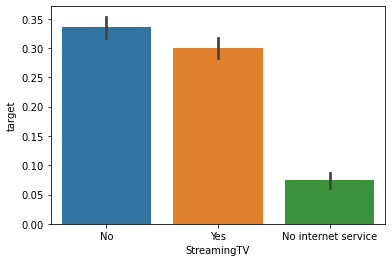

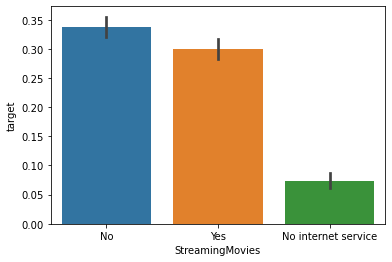

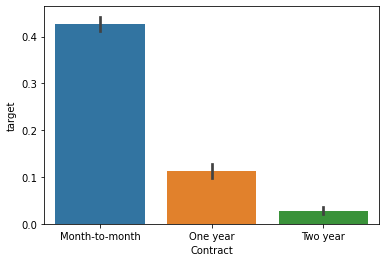

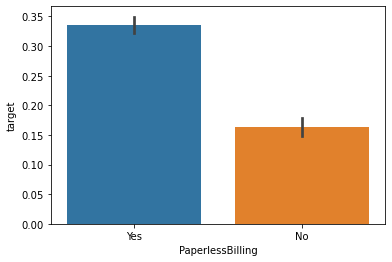

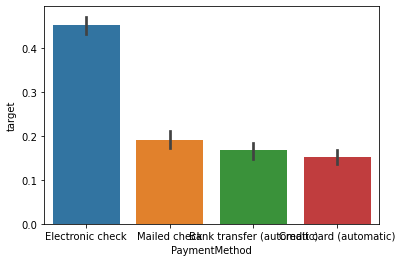

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

#### From the above plots we can say that internet optics with Fiber optics is most likely to churn and people with no online security are also most likely to churn and people who have opted for a month-month contract are more likely to churn

In [36]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [37]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

## Part 2 - Select K Best

In [39]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [42]:
select_features_df_char.shape

(7043, 20)

## Feature Selection - Numerical Indicator Features 

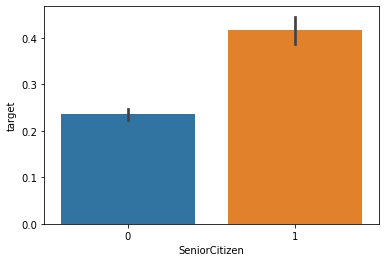

In [43]:
X_ind_merged=pd.concat([y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_ind_merged, estimator=mean )
plt.show()

In [44]:
select_features_df_ind=ind

In [45]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

In [46]:
y.value_counts()

0    5174
1    1869
Name: target, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, y, test_size=0.3, random_state=10)

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4930, 24), (2113, 24), (4930,), (2113,))

In [50]:
# Various models are used and the best model is selected
# Logistic Regression
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [52]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,0.010674
1,Dependents_Yes,-0.095012
2,InternetService_Fiber optic,0.598124
3,InternetService_No,-0.173241
4,OnlineSecurity_No internet service,-0.173241
5,OnlineSecurity_Yes,-0.616836
6,OnlineBackup_No internet service,-0.173241
7,OnlineBackup_Yes,-0.299833
8,DeviceProtection_No internet service,-0.173241
9,DeviceProtection_Yes,-0.019946


## Model Evaluation for Logistic regression

In [56]:
y_pred_logreg=logreg.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.79649787032655
Precision 0.6365591397849463
Recall 0.5314183123877917
f1_score 0.5792563600782779


In [57]:
metrics.confusion_matrix(y_test, y_pred_logreg)

array([[1387,  169],
       [ 261,  296]], dtype=int64)

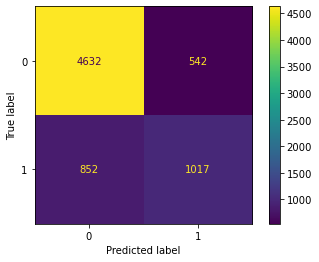

In [58]:
metrics.plot_confusion_matrix(logreg,X_all,y)

In [75]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,0.010674
1,Dependents_Yes,-0.095012
2,InternetService_Fiber optic,0.598124
3,InternetService_No,-0.173241
4,OnlineSecurity_No internet service,-0.173241
5,OnlineSecurity_Yes,-0.616836
6,OnlineBackup_No internet service,-0.173241
7,OnlineBackup_Yes,-0.299833
8,DeviceProtection_No internet service,-0.173241
9,DeviceProtection_Yes,-0.019946


## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [54]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 5, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 250}


In [59]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=0)

## Model evaluation for Decision Tree

In [60]:
y_pred_tree=dtree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7879791765262659
Precision 0.6288416075650118
Recall 0.47755834829443444
f1_score 0.5428571428571427


In [61]:
metrics.confusion_matrix(y_test, y_pred_tree)

array([[1399,  157],
       [ 291,  266]], dtype=int64)

## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [63]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.200408
TotalCharges,0.149898
InternetService_Fiber optic,0.115766
PaymentMethod_Electronic check,0.086082
MonthlyCharges,0.084691
Contract_Two year,0.076559
OnlineSecurity_Yes,0.038781
Contract_One year,0.035319
InternetService_No,0.028913
TechSupport_Yes,0.027326


In [64]:
y_pred_rf=rf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7983909133932797
Precision 0.6641604010025063
Recall 0.4757630161579892
f1_score 0.5543933054393305


In [67]:
metrics.confusion_matrix(y_test,y_pred_rf)

array([[1422,  134],
       [ 292,  265]], dtype=int64)

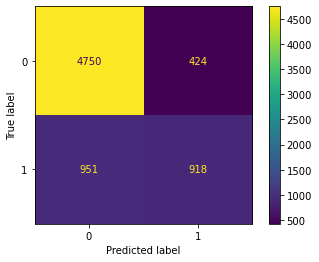

In [66]:
metrics.plot_confusion_matrix(rf,X_all,y)

## Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [69]:
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.207963
TotalCharges,0.185813
MonthlyCharges,0.166751
PaymentMethod_Electronic check,0.137275
InternetService_Fiber optic,0.133763
Contract_Two year,0.036155
Contract_One year,0.033409
PaperlessBilling_Yes,0.019680
OnlineSecurity_Yes,0.014681
TechSupport_Yes,0.013139


## Evaluating Gradient Boosting model

In [70]:
y_pred_gbm=gbm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7974443918599148
Precision 0.6423841059602649
Recall 0.5224416517055656
f1_score 0.5762376237623762


In [72]:
metrics.confusion_matrix(y_test, y_pred_gbm)

array([[1394,  162],
       [ 266,  291]], dtype=int64)

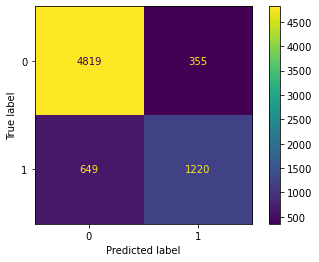

In [71]:
metrics.plot_confusion_matrix(gbm,X_all,y)

#### From the above models, the accuracy of all the models is almost same but w.r.t to the context, recall is more important as in this scinario False Negatives should be less and Gradient Boost model has the highest Recall and accuracy. Hence selecting Gradient Boost model 

In [76]:
# Tenure, Total Charges, Monthly Charges have the highes feature importance

In [77]:
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1

In [78]:
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [79]:
df['tenure'].mean()

32.37114865824223

In [80]:
#### Hence taking the 6th rank as threshold

In [81]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")

In [83]:
df.Tenure_Segment

0        Low Tenure
1        Low Tenure
2        Low Tenure
3       High Tenure
4        Low Tenure
           ...     
7038     Low Tenure
7039    High Tenure
7040     Low Tenure
7041     Low Tenure
7042    High Tenure
Name: Tenure_Segment, Length: 7043, dtype: object

In [84]:
df['TotalCharges_Rank']=pd.qcut(df['TotalCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [85]:
df.groupby('TotalCharges_Rank')['TotalCharges'].agg(['min','max','mean'])

,min,max,mean
TotalCharges_Rank,,,
1,18.80,83.40,48.527234
2,83.75,265.30,166.060227
3,265.35,547.80,398.534517
4,548.80,939.70,741.142045
5,939.80,1394.55,1167.725248
6,1395.05,2043.45,1688.916619
7,2044.75,3132.75,2570.101918
8,3132.75,4469.10,3786.084872
9,4473.00,5971.25,5208.207528


In [86]:
df.TotalCharges.mean()

2279.7989919068614

#### Taking the 7th rank

In [97]:
df['TotalCharges_Segment']=np.where(df['TotalCharges_Rank']<=7,"Low Charge","High Charge")
df.TotalCharges_Segment

0        Low Charge
1        Low Charge
2        Low Charge
3        Low Charge
4        Low Charge
           ...     
7038     Low Charge
7039    High Charge
7040     Low Charge
7041     Low Charge
7042    High Charge
Name: TotalCharges_Segment, Length: 7043, dtype: object

In [88]:
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [90]:
df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

,min,max,mean
MonthlyCharges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [91]:
df.MonthlyCharges.mean()

64.76169246059922

#### Taking the 5th rank

In [95]:
df['MonthlyCharges_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charge","High Charge")
df.MonthlyCharges_Segment

0        Low Charge
1        Low Charge
2        Low Charge
3        Low Charge
4       High Charge
           ...     
7038    High Charge
7039    High Charge
7040     Low Charge
7041    High Charge
7042    High Charge
Name: MonthlyCharges_Segment, Length: 7043, dtype: object

## Slice the data with respect to Top 4 and Bottom 6 Probability Ranks from the GBM Model

In [98]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1

In [100]:
df['P_Rank_GBM'].head()

0    7
1    3
2    9
3    3
4    9
Name: P_Rank_GBM, dtype: int8

In [102]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_GBM']>=8,"Top 3","Bottom 7")

In [103]:
df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3',:]

In [105]:
df_top3.shape

(2113, 29)

In [107]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
target=['target']

In [108]:
df_top3_services=df_top3[service_list]

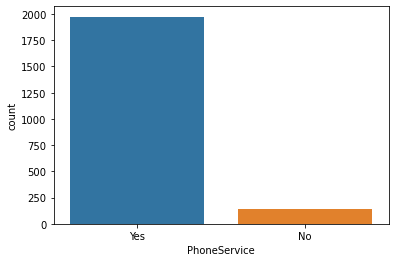

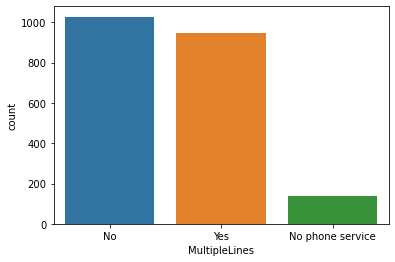

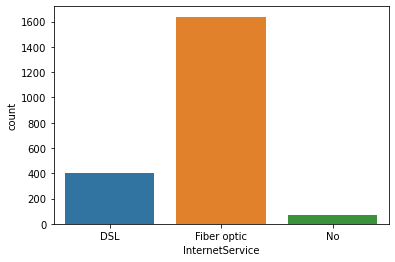

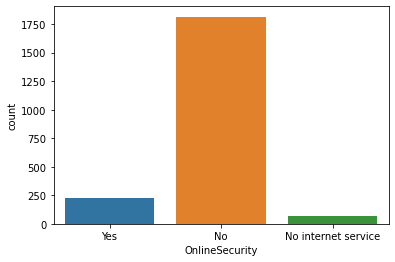

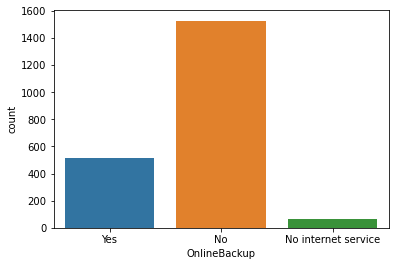

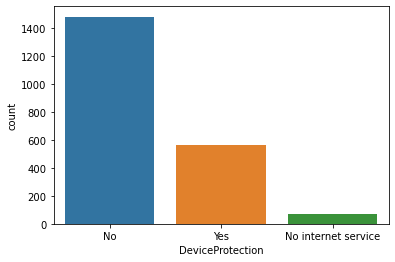

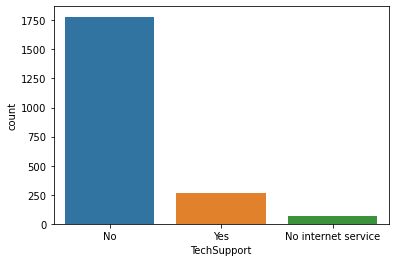

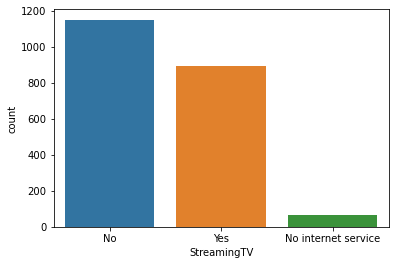

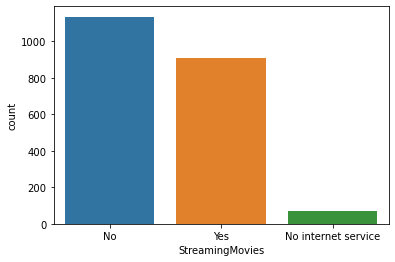

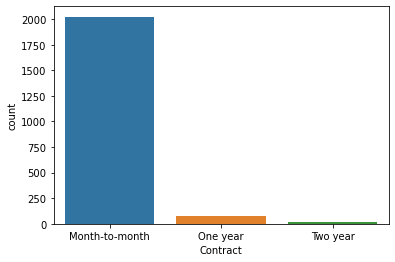

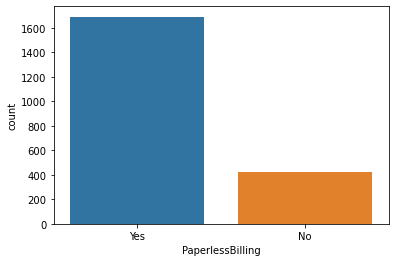

In [109]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

In [114]:
pd.crosstab(index=df_top3['MonthlyCharges_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['target'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
MonthlyCharges_Segment,,
High Charge,190,1317
Low Charge,14,592


#### High charge, High Tenure and Low charge and High Tenure are less likely to churn and high charge with low tenure means many churns

In [118]:
pd.crosstab(index=df_top3['TotalCharges_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['target'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
TotalCharges_Segment,,
High Charge,192,58
Low Charge,12,1851


In [ ]:
# Recommendations
# Device Protection with Online Services
# Convert customer to DSL if they are facing challenges with Fiber Optics
# Offer discounts on Yearly contracts